In [3]:
#importing data 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
#data preparation
df.shape

(9994, 13)

In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [8]:
df['Country'].unique()

array(['United States'], dtype=object)

In [9]:
#dataset is from only one country i.e. USA. So droping the country and postal code columns 
df1=df.drop(['Country','Postal Code'],axis=1)
df1.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
df1.isna().sum()

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
df1.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


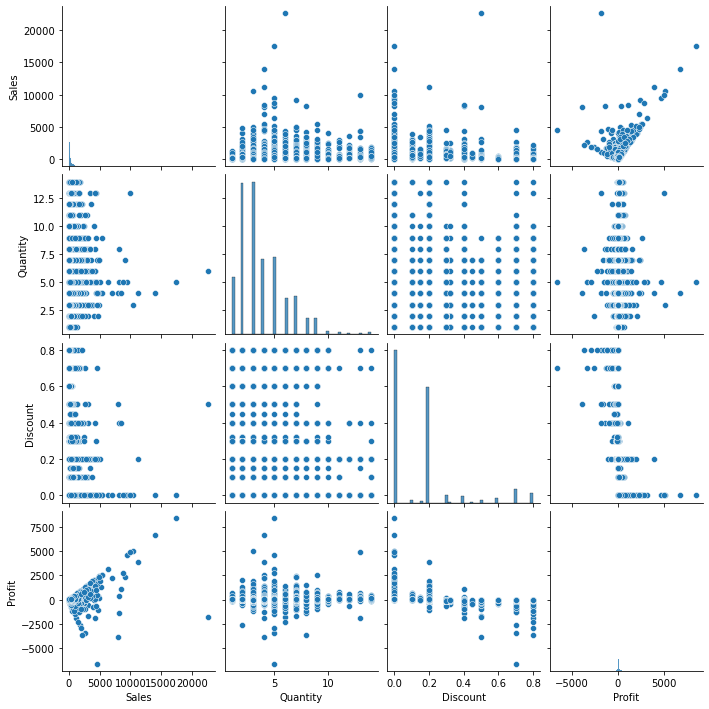

In [12]:
#data analysis
sns.pairplot(df1)

In [23]:
#finding correlation
df1.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


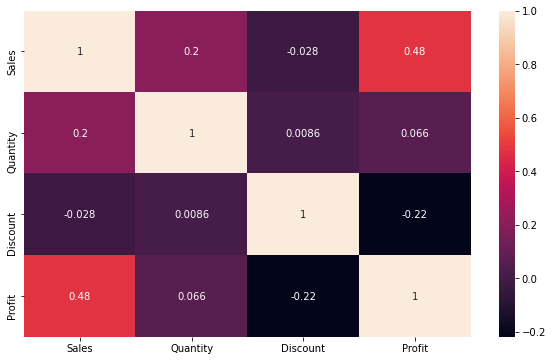

In [25]:
#ploting the heat map
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [26]:
#Most correlation is between Profit and Sales

In [32]:
df1.Region.value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [30]:
#analysing regionwise profi and sales
region=df1.groupby("Region")[['Profit','Sales']].sum()
region

,Profit,Sales
Region,,
Central,39706.3625,501239.8908
East,91522.7800,678781.2400
South,46749.4303,391721.9050
West,108418.4489,725457.8245


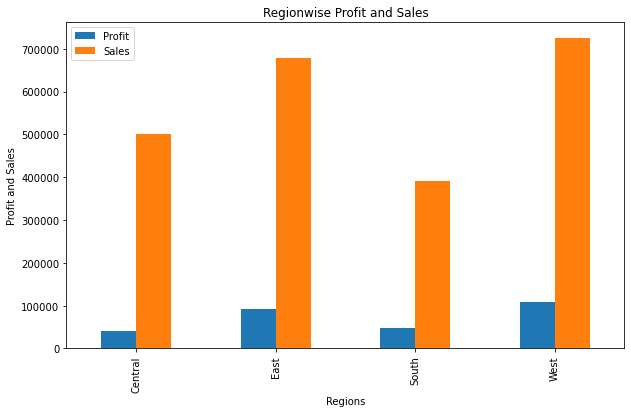

In [35]:
plot1=region.plot(kind='bar',figsize=(10,6))
plt.title('Regionwise Profit and Sales')
plt.ylabel('Profit and Sales')
plt.xlabel('Regions')
plt.show()

In [ ]:
#Maximum profit and sales are observed in West Region

In [40]:
cat=df1['Category'].value_counts()
cat

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

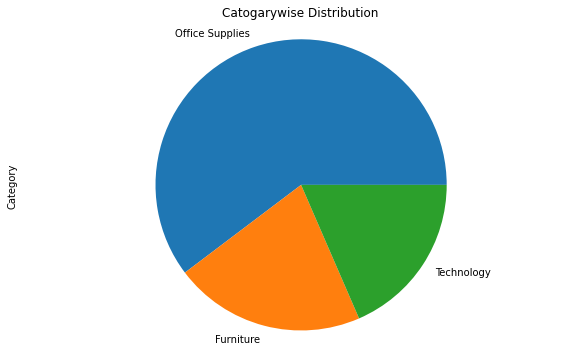

In [43]:
plot2=cat.plot(kind='pie',figsize=(10,6))
plt.title('Catogarywise Distribution')
plt.axis("equal")
plt.show()

In [48]:
#analyzing categorywise salse and profit
category=df1.groupby("Category")[["Profit","Sales"]].sum()

,Profit,Sales
Category,,
Furniture,18451.2728,741999.7953
Office Supplies,122490.8008,719047.0320
Technology,145454.9481,836154.0330


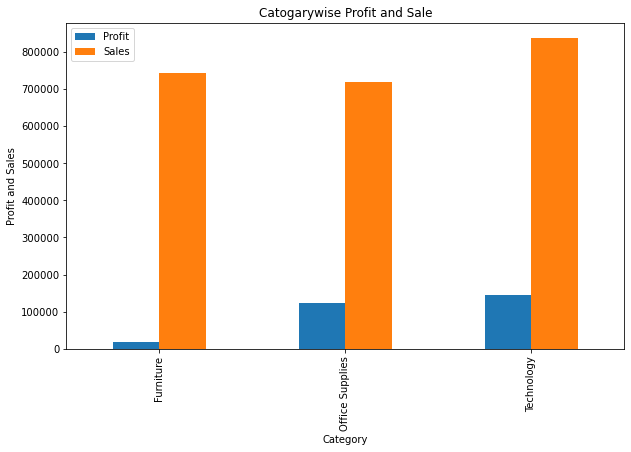

In [46]:
plot3=category.plot(kind='bar',figsize=(10,6))
plt.title('Catogarywise Profit and Sale')
plt.ylabel('Profit and Sales')
plt.show()

In [49]:
#Maximum Profit is in Technology Category

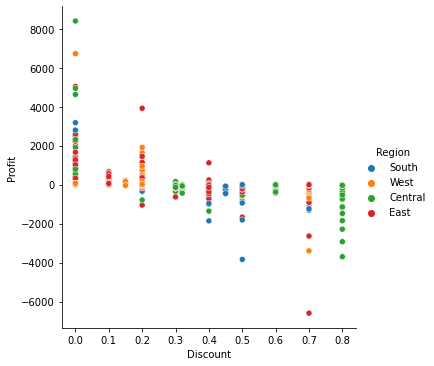

In [55]:
#analysing profit upon giving discount in different regions
sns.relplot(x='Discount',y='Profit',hue='Region',data=df1)

In [56]:
#Loss with high discount on office supplies. Discount upto 20% on office supplies is profitable. No loss upto 15% discount. 
#Profit in west region with discount but major loss in central region So 20-25% Discount in West region in permiable

In [13]:
sc=df1['Sub-Category'].value_counts()

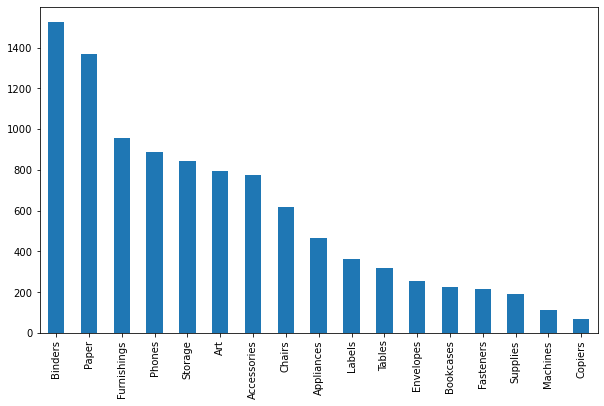

In [14]:
sc.plot(kind='bar',figsize=(10,6))
plt.show()

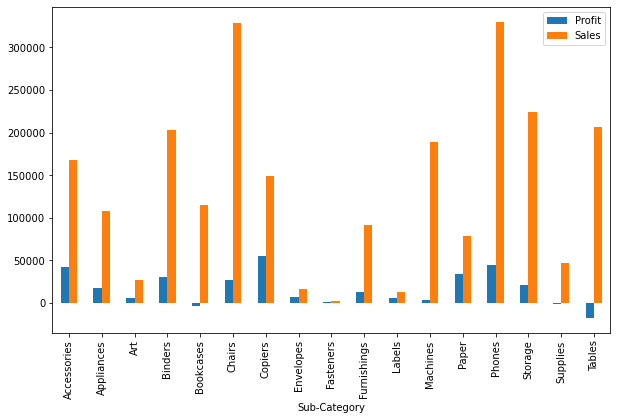

In [15]:
#analysing profit subcategory wise
sc_profit=df1.groupby('Sub-Category')[['Profit','Sales']].sum()
sc_profit.plot(kind='bar',figsize=(10,6))
plt.show()
# max profit is with copiers and loss is with tables
# max sales is of phones and chairs